# Quantum Computing Refresher Tutorial 
Adam Lyon/Fermilab SCD

September 13, 2018

Hi, I'm Adam...

I'm a Fermilab Senior Scientist.

I mostly work managing part of the Scientific Computing Division and am a scientist on the Muon g-2 Experiment. <img src="images/gm2.jpg" width="400"/>

I'm involved in Quantum Computing because it is applicable to my SCD role and I'm interested in how HEP researchers would use such systems (infrastructure, interfaces).

...and it's WAY COOL and new for me. Nothing like giving a tutorial to force yourself to learn something new. 

We'll mostly follow the [Argonne Workshop Tutorial](https://github.com/zhenghh04/QCWorkshop/blob/master/IntroQM/QCWorkshopANL18.ipynb) by Maththew Otten and Scott Aaronson's [lecture notes](https://www.scottaaronson.com/qclec/combined.pdf) (errors in this talk are mine alone, of course). 

Don't worry about the toolkits used here. Concentrate on the content. 

Goal: Understand the basics of some quantum gates

This will be really fast - not meant at all to be a comprehensive introduction to QC nor will we go over all of the rules of QC. There are lots of good resources out there. Google (the search engine) can help you find them. 


Let's go... Remember Probability... 

Say we have coin that is either heads or tails. 

A vector of classical probabilities can describe this system:

$ \begin{bmatrix}
           a \\
           b 
\end{bmatrix}^h_t
$ where $a, b \geq 0$ and $a+b=1$

We can turn the coin over...

$ \begin{bmatrix} 0 & 1 \\ 1 & 0 \\ \end{bmatrix} \begin{bmatrix}a \\ b\end{bmatrix}^h_t = \begin{bmatrix}b \\ a\end{bmatrix}^h_t$  

e.g. the transformation matrix is $\begin{bmatrix} P(\text{heads}|a) & P(\text{heads}|b) \\ P(\text{tails}|a) & P(\text{tails}|b)\end{bmatrix}$

so the old probability for heads is now the probability for tails and vice-versa

We can fairly flip the coin...

$ \begin{bmatrix} \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} \\ \end{bmatrix} \begin{bmatrix}a \\ b\end{bmatrix}^h_t = \begin{bmatrix}\frac{1}{2}(a+b) \\ \frac{1}{2}(a+b)\end{bmatrix}^h_t = \begin{bmatrix}\frac{1}{2} \\ \frac{1}{2}\end{bmatrix}^h_t$ 

We can do fancier things, like flip the coin, and if we get heads flip again but if we get tails we turn it to heads

$ \begin{bmatrix}\frac{1}{2} & 1 \\ \frac{1}{2} & 0 \end{bmatrix} \begin{bmatrix}a \\ b\end{bmatrix}^h_t = \begin{bmatrix}\frac{1}{2}a + b \\ \frac{1}{2} a\end{bmatrix}^h_t  $ ... remember $\begin{bmatrix} P(\text{heads}|a) & P(\text{heads}|b) \\ P(\text{tails}|a) & P(\text{tails}|b)\end{bmatrix}$

If flip and get heads, then $a=1, b=0$. Flip again and final outcome is random $\begin{bmatrix}1/2 \\ 1/2\end{bmatrix}^h_t $<br/>
If flip and get tails, then $a=0, b=1$. Turn over and always get heads. $\begin{bmatrix}1 \\ 0\end{bmatrix}^h_t$ <br/>
Sum of column is 1. 


Now two coins $ \begin{bmatrix} a \\ b \end{bmatrix}^h_t ,\; \begin{bmatrix} c \\ d \end{bmatrix}^h_t $

The combined probability is the **tensor product**

$ \begin{bmatrix} a \\ b \end{bmatrix}^h_t \bigotimes \begin{bmatrix} c \\ d \end{bmatrix}^h_t = \begin{bmatrix} P_{hh} \\ P_{ht} \\ P_{th} \\ P_{tt} \end{bmatrix}^{hh}_{tt} = \begin{bmatrix} ac \\ ad \\ bc \\ bd \end{bmatrix}^{hh}_{tt} $ 

 Note that some products are impossible for independent coins, like $\begin{bmatrix} 1/2 \\ 0 \\ 0 \\ 1/2 \end{bmatrix}^{hh}_{tt} $

Say we turn over the second coin only if the first coin is tails

$ \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} \begin{bmatrix} ac \\ ad \\ bc \\ bd \end{bmatrix}^{hh}_{tt} =  \begin{bmatrix} ac \\ ad \\ bd \\ bc \end{bmatrix}^{hh}_{tt}\; \; $ (Controlled not, **CNOT**)

Try starting with first coin random, second coin heads<br/>
$ \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} \begin{bmatrix} 1/2 \\ 0 \\ 1/2 \\ 0 \end{bmatrix}^{hh}_{tt} =  \begin{bmatrix} 1/2 \\ 0 \\ 0 \\ 1/2 \end{bmatrix}^{hh}_{tt} $

You can't get this with independent coins! They now must be correlated.

## Amplitudes and Probabilities

A classical configuration is given by a probability for it occurring, $p \in [0, 1]$ 

A quantum configuration is given by a complex amplitude $\alpha \in \mathbb{C}$, probability of measuring the quantum system in that configuration is $p = |\alpha|^2$

![](images/doubleslit.png) (Wikipedia)

This is a key difference between classical and quantum systems!

So now using amplitudes...

$ \begin{bmatrix} \alpha \\ \beta \end{bmatrix}^0_1 $ (for a two-state system - measured in state "0" or "1")

The probability that a measurement shows the system is 

in state 0 is $|\alpha|^2$ and is in state 1 is $|\beta|^2$ 

and $|\alpha|^2 + |\beta|^2 = 1$

System state described by unit vector in Hilbert space $\cal{H}$

We can simplify $ \begin{bmatrix} \alpha \\ \beta \end{bmatrix}^0_1 $ with 

$ \left|0\right> = \begin{bmatrix} 1 \\ 0 \end{bmatrix}^0_1  $ and $\left|1\right> = \begin{bmatrix} 0 \\ 1 \end{bmatrix}^0_1  $(these are basis vectors - the *Computational basis*)

So, $ \begin{bmatrix} \alpha \\ \beta \end{bmatrix}^0_1 = \alpha \left|0\right> + \beta \left|1\right> = \left|\psi\right> $ 

$ \left|\psi\right> = \alpha \left|0\right> + \beta \left|1\right> = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} $ (ket - column vector) 

$ \left<\psi\right| = \alpha^* \left<0\right| + \beta^* \left<1\right| = \begin{bmatrix} \alpha^* \; \beta^* \end{bmatrix} $ (bra - Hermitian conjugate - row vector)

$\left<v|w\right>$ is the inner product (projection of state $w$ onto $v$)

$ \left<\psi | \psi \right> = \alpha^* \alpha \left<0|0\right>  + \beta^* \beta \left<1|1\right> = |\alpha|^2 + |\beta|^2 = 1 $

$ \left< 0 | 1 \right> = \left< 1 | 0 \right> = 0 $ (basis vectors are orthogonal)

$\left<v|w\right> = \left<w|v\right>^*$

Linear transformation changes quantum states $U \begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \begin{bmatrix} \alpha' \\ \beta' \end{bmatrix} $

$U$ is **unitary** if $| \alpha |^2 + | \beta |^2 = | \alpha' |^2 + | \beta' |^2 $ (preserves the norm)

A unitary matrix maps to a unitary transformation

$ \left|\psi'\right> = \alpha' \left|0\right> + \beta' \left|1\right> =  U \left|\psi\right> $

Unitary transformations preserve the the norm

$ \left< \psi | \psi \right> = \Big(U \left| \psi \right>\Big)^\dagger \; U\left|\psi\right> = \left< \psi | U^\dagger U | \psi \right>$

So, for any $\psi$, $U^\dagger U = I$ and thus $U^{-1} = U^\dagger$

and the rows of $U$ form and ortho-normal unit basis

We can transform to other bases, such as,

$\left| + \right> = \frac{\left| 0 \right> + \left| 1 \right>}{\sqrt{2}}, \; 
\left| - \right> = \frac{\left| 0 \right> - \left| 1 \right>}{\sqrt{2}} $  (*Hadamard Basis*)

$\left| i \right> = \frac{\left| 0 \right> + i\left| 1 \right>}{\sqrt{2}}, \; 
\left| -i \right> = \frac{\left| 0 \right> - i\left| 1 \right>}{\sqrt{2}} $

Rotating into other bases, for example,

$ R_\theta = \begin{bmatrix} \cos\theta && -\sin\theta \\ \sin\theta && \cos\theta \end{bmatrix} $, so $ R_{\pi/4} = \begin{bmatrix} 1/\sqrt{2} && -1/\sqrt{2} \\ 1/\sqrt{2} && 1/\sqrt{2} \end{bmatrix} $

And

$R_{\pi/4} \left| 0 \right> = \left| + \right> $, $R_{\pi/4} \left| + \right> = \left| 1 \right>$

$R_{\pi/4} \left| 1 \right> = -\left| - \right> $,

This two state system is a *qubit*

Like a classical bit, upon measurement it is either "0" or "1"

Unlike a classical bit, the qubit's amplitude makes for rich phenomena, like superposition

## Bloch Sphere

Represent state of the qubit as $  |\psi\rangle = \cos\Big(\frac{\theta}{2}\Big) |0\rangle + e^{i\phi} \sin\Big(\frac{\theta}{2}\Big) |1\rangle$ 

Plot this on a sphere. Note global phase.  (Click on the sphere)

In [ ]:
# If you are running in Google Colab, you need to uncomment the next two lines and run this cell (may take a long time)
#!pip install qutip
#!pip install qiskit

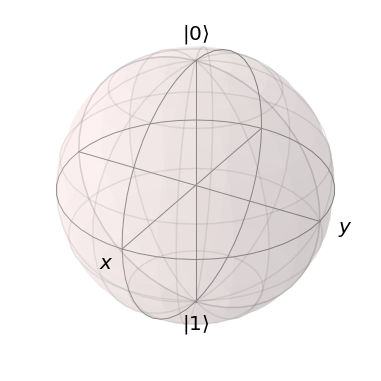

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

b = qt.Bloch()
b.show()

$ \left| \psi \right> = \left| 0 \right> $

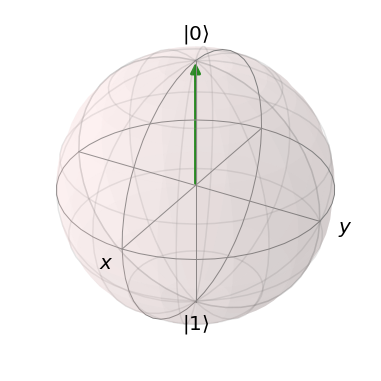

In [2]:
# Make some basis vectors
zero = qt.basis(2, 0)
one  = qt.basis(2, 1)

b.clear()
b.add_states(zero)
b.render()

$ \left| \psi \right> = \left| 1 \right> $

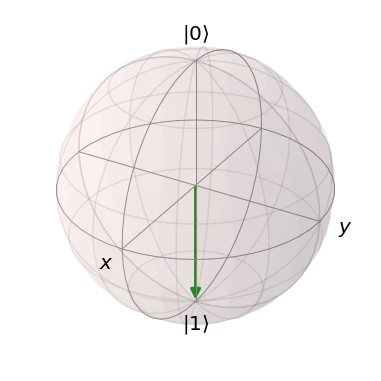

In [3]:
b.clear()
b.add_states(one)
b.render()

Superposition  $ \left| \psi \right> = \frac{1}{\sqrt{2}} \Big( \left| 0 \right> + \left| 1 \right> \Big) $

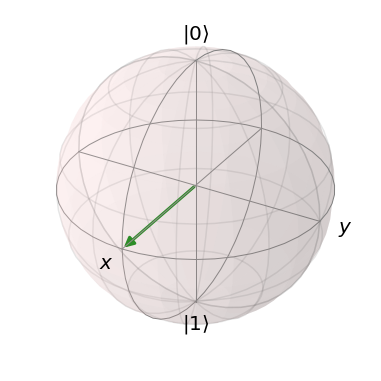

In [4]:
b.clear()
b.add_states( (zero+one).unit() )
b.render()

$ \left| + \right>  $ and $ \left| - \right> $

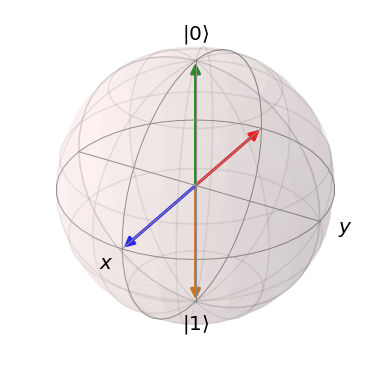

In [5]:
b.clear()
b.add_states( zero )
b.add_states( one )
b.add_states( (zero+one).unit() )
b.add_states( (zero-one).unit() )
b.render()

$ \left| i \right>  $ and $ \left| -i \right> $

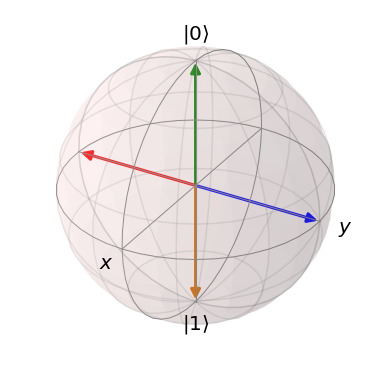

In [6]:
b.clear()
b.add_states( zero )
b.add_states( one )
b.add_states( (zero + 1.j* one).unit() )
b.add_states( (zero - 1.j* one).unit() )
b.render()

Another superposition:
    
$ \left|\psi\right> = R_{\pi/3} \left| 0 \right> = \frac{1}{2} \left| 0 \right> + \frac{\sqrt{3}}{2} \left| 1 \right> $; $ P(0) = 1/4, P(1) = 3/4 $

And add a phase... $ \left|\psi'\right> =  \frac{1}{2} \left| 0 \right> + \sqrt{\frac{3}{8}} \, (1 + i) \left| 1 \right> $




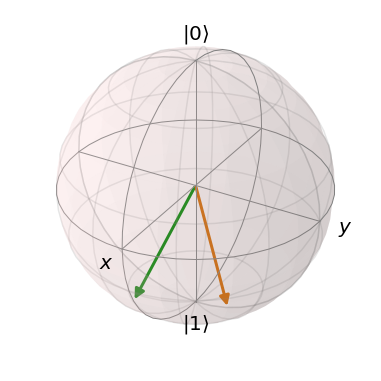

In [7]:
import math
b.clear()
b.add_states( ( 0.5*zero + math.sqrt(3)/2*one ) )
b.add_states( ( 0.5*zero + math.sqrt(3/8)*(1+1.j)*one ) )
b.render()

Transform states with *gates*. One-qubit gates include the Pauli gates:

Pauli X: $\sigma_x = \begin{bmatrix} 0 && 1 \\ 1 && 0 \end{bmatrix}$, Pauli Y: $\sigma_y = \begin{bmatrix} 0 && -i \\ i && 0 \end{bmatrix}$, Pauli Z: $\sigma_z = \begin{bmatrix} 1 && 0 \\ 0 && -1 \end{bmatrix}$

They just reflect about axes. Can also do with rotations.  $\sigma_x$ is also the NOT gate and is $(R_{\pi/4})^2$

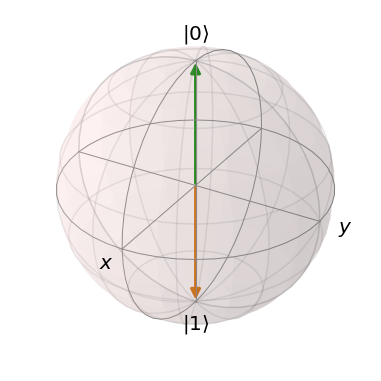

In [8]:
b.clear()
b.add_states(zero)
b.add_states(qt.sigmax()*zero)
b.render()

An extremely important gate is the *Hadamard* gate... $ H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 && 1 \\ 1 && -1 \end{bmatrix}$. 

It will put qubits into and out of the superposition state.

$ H \left| 0 \right> = \frac{1}{\sqrt{2}} \Big(  \left| 0 \right> +  \left| 1 \right> \Big)  =  \left| + \right>$, $ H \left| + \right> = \left| 0 \right> $, $ H \left| 1 \right> = \left| - \right> $, $ H \left| - \right> = \left| 1 \right> $



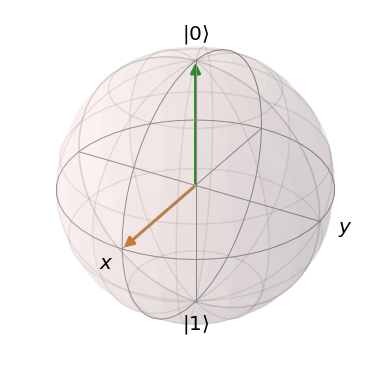

In [9]:
b.clear()
b.add_states(zero)
b.add_states(qt.snot()*zero)
b.render()

A *circuit* is a series of gates on one or more qubits. Time goes to the right. The measurements are assumed to take place in the $\left| 0 \right>$, $\left| 1 \right>$ basis. 

Let's do a Hadamard gate and measure the outcome.

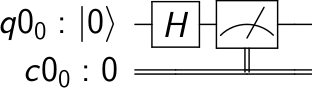

In [10]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.tools.visualization import plot_histogram, circuit_drawer, matplotlib_circuit_drawer

q = QuantumRegister(1)
c = ClassicalRegister(1)
h = QuantumCircuit(q, c)
h.h(q)
h.measure(q, c)

circuit_drawer(h)

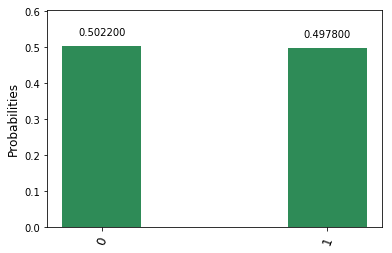

In [11]:
job = execute(h, backend = 'local_qasm_simulator', shots=5000)
plot_histogram(job.result().get_counts(h))

Let's try two...

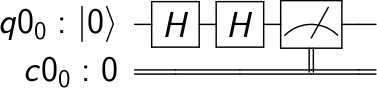

In [12]:
h2 = QuantumCircuit(q, c)
h2.h(q)
h2.h(q)
h2.measure(q, c)
circuit_drawer(h2)

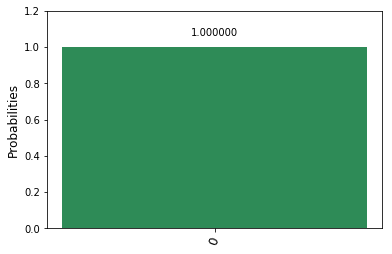

In [13]:
job = execute(h2, backend = 'local_qasm_simulator', shots=5000)
plot_histogram(job.result().get_counts(h2))

One qubit circuits are kinda boring. Add more qubits!

$ \left| \psi \right> =  \left| \text{ qubit #1 state } \right> \otimes \left| \text{ qubit #2 state } \right>$ 
 
We'll use an efficient notation, e.g., $ \left| 0 \right> \otimes \left| 0 \right> =  \left| 0 \right> \left| 0 \right>  = \left| 0, 0 \right> = \left| 00 \right> $

$ \left| \psi \right> = \alpha \left| 00 \right> + \beta \left| 01 \right> + \gamma \left| 10 \right> + \delta \left| 11 \right> $ ... in vector form $ \begin{bmatrix} \alpha \\ \beta \\ \gamma \\ \delta \end{bmatrix}^{00}_{11} $

Probability of, say, both qubits measure to be in 0 state, is $ |\alpha|^2 $

Probability of measuring the first qubit in the 0 state is $ |\alpha|^2 + |\beta|^2$ <br/>
Probability of measuring the first qubit in the 1 state is $ |\gamma|^2 + |\delta|^2$

If we measure the first qubit to be in 0, what is the state of the system now?

$\left| \psi \right> = \left| 0 \right> \bigotimes \frac{ \alpha \left| 0 \right> + \beta \left| 1 \right> }{\sqrt{|\alpha|^2 + |\beta|^2}} $


Let's make a full superposition

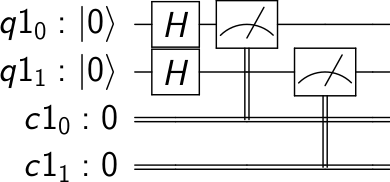

In [14]:
q2 = QuantumRegister(2)
c2 = ClassicalRegister(2)
h2 = QuantumCircuit(q2, c2)
h2.h(q2[0])
h2.h(q2[1])
h2.measure(q2[0], c2[0])
h2.measure(q2[1], c2[1])
circuit_drawer(h2)

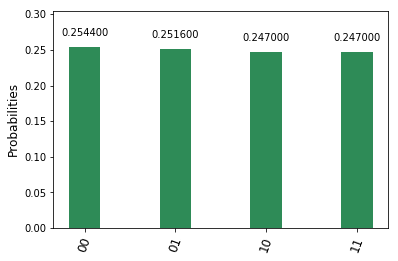

In [15]:
job = execute(h2, backend = 'local_qasm_simulator', shots=5000)
plot_histogram(job.result().get_counts(h2))

A little more fancy (but kinda dumb)...

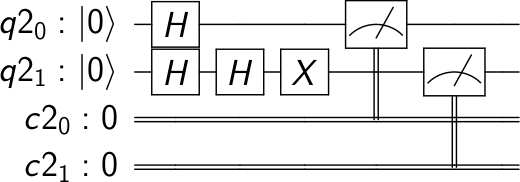

In [16]:
q2 = QuantumRegister(2)
c2 = ClassicalRegister(2)
h2 = QuantumCircuit(q2, c2)
h2.h(q2[0])
h2.h(q2[1])
h2.h(q2[1])
h2.x(q2[1])
h2.measure(q2[0], c2[0])
h2.measure(q2[1], c2[1])
circuit_drawer(h2)

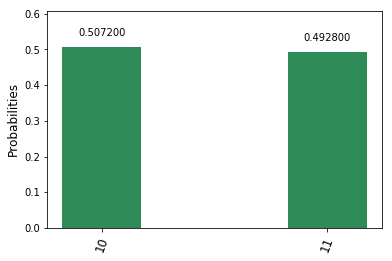

In [17]:
job = execute(h2, backend = 'local_qasm_simulator', shots=5000)
plot_histogram(job.result().get_counts(h2))

Qubits can "interact" via certain gates ... The *Controlled Not* (CNOT) gate (CX)...

Flip the second bit (target) if the first bit (control) is 1

CX $ = \begin{bmatrix} 1 && 0 && 0 && 0 \\ 0 && 1 && 0 && 0 \\ 0 && 0 && 0 && 1 \\ 0 && 0 && 1 && 0 \end{bmatrix} $

We've seen this before with the coins. There's CY, CZ, CPhase too.

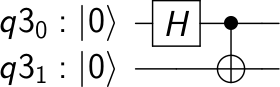

In [18]:
q2 = QuantumRegister(2)
c2 = ClassicalRegister(2)
h2 = QuantumCircuit(q2)
h2.h(q2[0])
h2.cx(q2[0], q2[1])
circuit_drawer(h2)

$ \left| 00 \right> \rightarrow \frac{\left| 00 \right>  + \left| 10 \right>}{\sqrt{2}} \rightarrow \frac{\left| 00 \right>  + \left| 11 \right>}{\sqrt{2}}  $

$ \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} \rightarrow \begin{bmatrix} \frac{1}{\sqrt{2}} \\ 0 \\ \frac{1}{\sqrt{2}} \\ 0 \end{bmatrix} \rightarrow \begin{bmatrix} \frac{1}{\sqrt{2}} \\ 0 \\ 0 \\ \frac{1}{\sqrt{2}} \end{bmatrix}$

Final state is a Bell Pair (or EPR Pair) and is fully entangled (not decomposable into a tensor product). If you know one qubit, you know the other. 

Let's try it

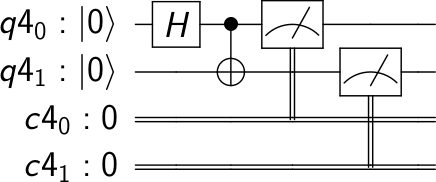

In [19]:
q2 = QuantumRegister(2)
c2 = ClassicalRegister(2)
h2 = QuantumCircuit(q2, c2)
h2.h(q2[0])
h2.cx(q2[0], q2[1])
h2.measure(q2[0], c2[0])
h2.measure(q2[1], c2[1])
circuit_drawer(h2)

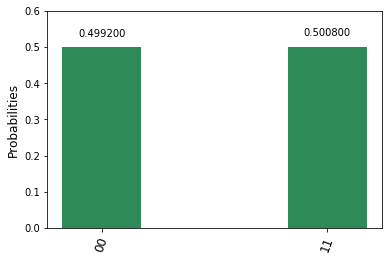

In [20]:
job = execute(h2, backend = 'local_qasm_simulator', shots=5000)
plot_histogram(job.result().get_counts(h2))

Remember - we've looked at ideal quantum computers (no noise)

That's it from me. 

There are more gates (e.g. parameterized rotations, controlled pauli gates, 3 qubit gates)

There are more rules and more stuff (sorry - wish I had time to write up an algorithm)

...but on to Cirq...